# Alexandria house price

  <img src="https://wallpapers.com/images/hd/alexandria-coast-in-egypt-ockcgyon6fzkjw2a.jpg" alt="alexandria" width="600" height="500">
</div>

## import data


In [1330]:
import pandas as pd
import numpy as np
import re
import warnings 
warnings.filterwarnings('ignore')

In [1331]:
df=pd.read_csv('Egypt_Houses_Price.csv')

In [1332]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [1333]:
df.columns

Index(['Type', 'Price', 'Bedrooms', 'Bathrooms', 'Area', 'Furnished', 'Level',
       'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City'],
      dtype='object')

## choose Alexandria neighborhoods only

In [1334]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [1335]:
df['City'].nunique()

183

In [1336]:
df['City'].unique()

array(['Nasr City', 'Camp Caesar', 'Smoha', 'New Cairo - El Tagamoa',
       'Sheikh Zayed', 'Shorouk City', 'Sidi Beshr', 'Gesr Al Suez',
       'Mokattam', 'New Capital City', 'New Damietta', 'Zahraa Al Maadi',
       '6th of October', 'Mansura', 'New Heliopolis',
       'Kafr al-Sheikh City', 'Badr City', 'Sporting', 'Imbaba', 'Gamasa',
       'Borg al-Arab', 'Mohandessin', 'Glim', 'Ain Sukhna', 'Abasiya',
       'Fleming', 'Maadi', 'Hadayek 6th of October', 'Madinaty', 'Haram',
       'Damietta City', 'Ismailia City', '10th of Ramadan', 'Heliopolis',
       'Rehab City', 'Dar al-Salaam', 'Hadayek al-Ahram', 'North Coast',
       'Nakheel', 'Bacchus', 'Obour City', 'Hurghada', 'Agouza', 'Tanta',
       'Tura', 'Faisal District', 'Mandara', 'Helmeyat El Zaytoun',
       'Katameya', 'Only in Apartments & Duplex for Sale', 'Alamein',
       'Qasr al-Nil', 'Miami', 'Hadayek al-Kobba', 'Tersa',
       'Mostakbal City', 'Agami', 'Ras al-Bar', 'Port Fouad',
       'Salam City', 'Aswan City

In [1337]:
df['City']=df.City.str.lower()

In [1338]:
df['City']=df.City.str.replace(r'\W','')

In [1339]:
city_data=df['City'].unique()

In [1340]:

#neighborhoods in Alexandria in September 2021

target_data =pd.DataFrame( [
    "Al Hadrah Qebli",
    "Amreya",
    "Anfoushi",
    "Asafra",
    'Agami',
    "Azarita",
    "Bahary",
    "Bakos",
    "Baucalis",
    "Bolkly",
    "Camp Chezar",
    "Cleopatra ",
    "Dekhela",
    "Downtown, Alexandria",
    "El Atareen",
    "El Gomrok",
    "El Ibrahimiya ",
    "El Labban",
    "El Maamora Beach",
    "El Maamora",
    "El Mandara",
    "El Manshiyya",
    "El Max",
    "El Qabary",
    "El Saraya ",
    "El Soyof",
    "Fleming ",
    "Gianaclis",
    "Glim",
    "Kafr Abdu",
    "Karmoz",
    "Kom El Deka",
    "Louran ",
    "Mahatet El Raml",
    'Raml Station',
    "Miami",
    "Moharam Bek",
    "Montaza",
    "Roshdy",
    "Saba Pasha",
    "Safar",
    "San Stefano ",
    "Shatby",
    "Shods",
    "Sidi Bishr",
    "Sidi Gaber",
    "Smouha",
    "Sporting ",
    "Stanley ",
    "Tharwat",
    "Victoria",
    "Wardeyan",
    "Zezenia"
] )

In [1341]:
target_data=target_data[0].str.lower()

In [1342]:
target_data=target_data.str.replace(r'\W','')

In [1343]:
target_data=list(target_data)
city_data=list(city_data)

#### there might be spelling mistakes in the original 182 names, so we will use approximate string matching techniques to find the closest matches. One popular library in Python for this purpose is fuzzywuzzy.

In [1344]:
match=[]
for target in target_data:
    bestmatch=process.extractOne(target,city_data)
    matched_neighborhood = bestmatch[0]
    similarity_score = bestmatch[1]
    print(f"Target Neighborhood: {target}")
    print(f"Best Match: {matched_neighborhood}")
    print(f"Similarity Score: {similarity_score}\n")
    match.append(matched_neighborhood)

Target Neighborhood: alhadrahqebli
Best Match: alhadrah
Similarity Score: 90

Target Neighborhood: amreya
Best Match: amreya
Similarity Score: 100

Target Neighborhood: anfoushi
Best Match: bahrayanfoshy
Similarity Score: 72

Target Neighborhood: asafra
Best Match: asafra
Similarity Score: 100

Target Neighborhood: agami
Best Match: agami
Similarity Score: 100

Target Neighborhood: azarita
Best Match: azarita
Similarity Score: 100

Target Neighborhood: bahary
Best Match: bahrayanfoshy
Similarity Score: 75

Target Neighborhood: bakos
Best Match: hadayekalkobba
Similarity Score: 54

Target Neighborhood: baucalis
Best Match: gianaclis
Similarity Score: 59

Target Neighborhood: bolkly
Best Match: bolkly
Similarity Score: 100

Target Neighborhood: campchezar
Best Match: campcaesar
Similarity Score: 80

Target Neighborhood: cleopatra
Best Match: cleopatra
Similarity Score: 100

Target Neighborhood: dekhela
Best Match: hadayekhelwan
Similarity Score: 77

Target Neighborhood: downtownalexandri

In [1345]:
re={'gianaclis','hadayekhelwan','downtowncairo','saftellaban','sharabeya','zamalek','tura','tersa','haram','shoroukcity'}
match=list(set(match)-re)

In [1346]:
match

['alhadrah',
 'fleming',
 'bahrayanfoshy',
 'sanstefano',
 'laurent',
 'victoria',
 'hadayekalkobba',
 'shatby',
 'bolkly',
 'agami',
 'kabbary',
 'smoha',
 'zezenia',
 'glim',
 'sidibeshr',
 'gomrok',
 'sabapasha',
 'amreya',
 'miami',
 'manshiyya',
 'sidigaber',
 'talkha',
 'cleopatra',
 'alibrahimiyyah',
 'ramlstation',
 'kafrabdo',
 'roushdy',
 'sporting',
 'maamoura',
 'stanley',
 'montazah',
 'asafra',
 'aga',
 'azarita',
 'campcaesar',
 'seyouf',
 'mandara',
 'elmax']

In [1347]:
df=df[df.City.isin(match)]

In [1348]:
df.City.unique()

array(['campcaesar', 'smoha', 'sidibeshr', 'sporting', 'glim', 'fleming',
       'mandara', 'miami', 'hadayekalkobba', 'agami', 'bolkly',
       'maamoura', 'seyouf', 'sidigaber', 'laurent', 'alibrahimiyyah',
       'cleopatra', 'talkha', 'manshiyya', 'roushdy', 'alhadrah',
       'sanstefano', 'bahrayanfoshy', 'asafra', 'sabapasha', 'kafrabdo',
       'azarita', 'montazah', 'zezenia', 'shatby', 'stanley', 'amreya',
       'gomrok', 'ramlstation', 'victoria', 'elmax', 'aga', 'kabbary'],
      dtype=object)

## Data preprocessing

In [1349]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale

In [1350]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,campcaesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,smoha
12,Apartment,550000,2.0,1.0,94.0,No,2,Unknown,Cash,Ready to move,Finished,smoha
13,Apartment,2600000,3.0,2.0,140.0,Yes,10+,Unknown,Cash or Installment,Ready to move,Finished,sidibeshr
25,Apartment,1730000,3.0,2.0,160.0,No,7,Unknown,Unknown Payment,Unknown,Unknown,smoha


In [1351]:
df.shape

(634, 12)

In [1352]:
df.duplicated().sum()

4

In [1353]:
df=df.drop_duplicates()

In [1354]:
df.shape

(630, 12)

In [1355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 1 to 27064
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            630 non-null    object
 1   Price           630 non-null    object
 2   Bedrooms        626 non-null    object
 3   Bathrooms       629 non-null    object
 4   Area            627 non-null    object
 5   Furnished       630 non-null    object
 6   Level           630 non-null    object
 7   Compound        630 non-null    object
 8   Payment_Option  630 non-null    object
 9   Delivery_Date   630 non-null    object
 10  Delivery_Term   630 non-null    object
 11  City            630 non-null    object
dtypes: object(12)
memory usage: 64.0+ KB


In [1356]:
df.describe()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
count,630,630,626,629,627,630,630,630,630,630,630,630
unique,8,230,14,13,166,3,14,15,4,9,5,38
top,Apartment,1350000,3,1,120.0,No,10+,Unknown,Cash,Ready to move,Finished,smoha
freq,530,15,267,208,34,462,91,563,420,329,459,127


In [1357]:
df.isnull().sum()

Type              0
Price             0
Bedrooms          4
Bathrooms         1
Area              3
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

### Type

In [1358]:
df['Type'].unique()

array(['Apartment', 'Duplex', 'Standalone Villa', 'Chalet', 'Penthouse',
       'Studio', 'Town House', 'Stand Alone Villa'], dtype=object)

In [1359]:
df=df.replace({'Standalone Villa':'Stand Alone Villa'})

In [1360]:
df['Type'].unique()

array(['Apartment', 'Duplex', 'Stand Alone Villa', 'Chalet', 'Penthouse',
       'Studio', 'Town House'], dtype=object)

### Price

In [1361]:
df['Price']=df['Price'].astype('int')

### Bedrooms and Bathroom

In [1362]:
print(df['Bedrooms'].isnull().sum())

4


In [1363]:
print(df['Bathrooms'].isnull().sum())

1


In [1364]:
df2=df.dropna()

#### check if there is any linear realtion help me to predict nulls

In [1365]:
df2['Bedrooms'].astype('float').astype('int')
df2['Area'].astype('float').astype('int')
df2['Price'].astype('float').astype('int')

1        4000000
2        2250000
12        550000
13       2600000
25       1730000
          ...   
26292    7000000
26608    2300000
26616    1900000
27024    4000000
27064    2900000
Name: Price, Length: 625, dtype: int32

In [1366]:
df2[['Price','Area','Bedrooms']]=minmax_scale(df2[['Price','Area','Bedrooms']])

Text(0, 0.5, 'Bedrooms')

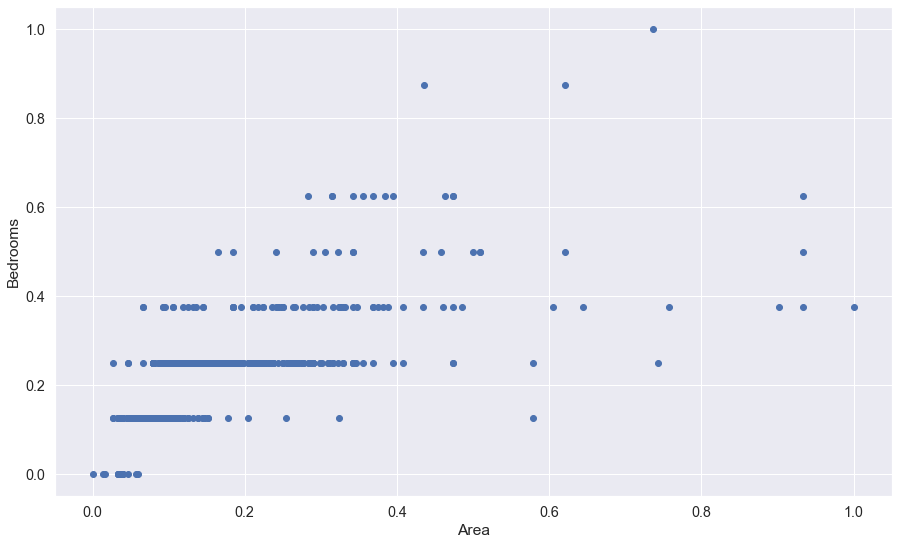

In [1367]:
plt.scatter(df2['Area'],df2['Bedrooms'])
plt.xlabel('Area')
plt.ylabel('Bedrooms')

Text(0, 0.5, 'Bedrooms')

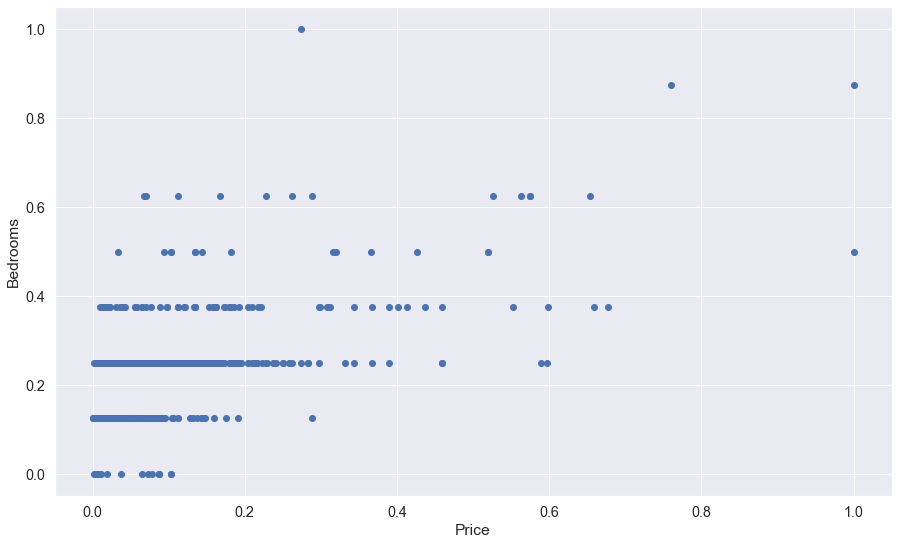

In [1368]:
plt.scatter(df2['Price'],df2['Bedrooms'])
plt.xlabel('Price')
plt.ylabel('Bedrooms')

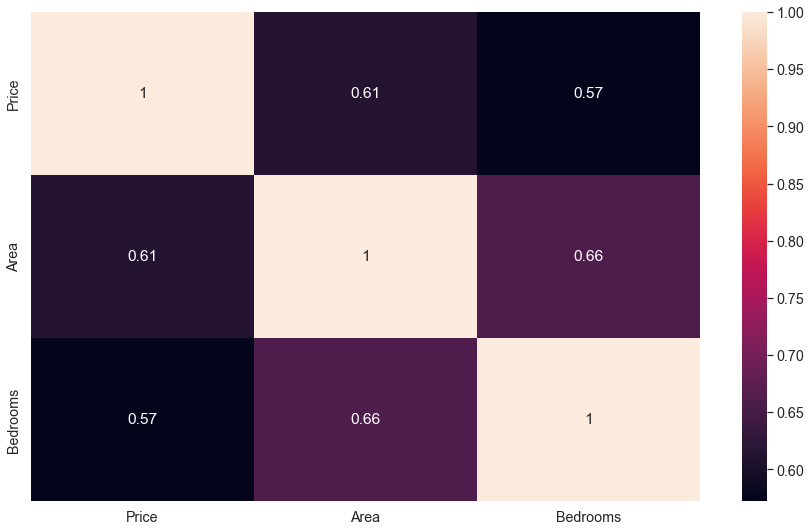

In [1369]:
sns.heatmap(df2[['Price','Area','Bedrooms']].corr(),annot=True)
plt.show()

#### there no relation so we will drop null

In [1370]:
df=df.dropna(axis=0,subset=['Bedrooms'])

In [1371]:
df.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              1
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

In [1372]:
df['Bedrooms']=df['Bedrooms'].astype('float').astype('int')

### Bathrooms

In [1373]:
print(df['Bathrooms'].isnull().sum())

0


In [1374]:
df['Bathrooms']=df['Bathrooms'].astype('float').astype('int')

In [1375]:
df.dtypes

Type              object
Price              int32
Bedrooms           int32
Bathrooms          int32
Area              object
Furnished         object
Level             object
Compound          object
Payment_Option    object
Delivery_Date     object
Delivery_Term     object
City              object
dtype: object

### Area

In [1376]:
df['Area'].isnull().sum()

1

In [1377]:
df['Area'].dtypes

dtype('O')

In [1378]:
df=df.dropna(axis=0,subset=['Area'])

In [1379]:
df['Area']=df['Area'].astype('float').astype('int')

### Furnished

In [1380]:
df['Furnished'].unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

### if number of unknows > 80% drop the column

In [1381]:
if (df[(df['Furnished']=='Unknown')].shape[0]/df.shape[0])*100 > 80:
    df=df.drop('Furnished',axis=1)

### we will try to predict if it Furnished or not using Delivery_Date and Delivery_term

In [1382]:
df2=df.dropna()

In [1383]:
df2['Delivery_Date']=df2['Delivery_Date'].astype('category')       
df2['Delivery_Term']=df2['Delivery_Term'].astype('category')
df2['Furnished']=df2['Furnished'].astype('category')

In [1384]:
df2['Furnished'].unique()

['No', 'Yes', 'Unknown']
Categories (3, object): ['No', 'Unknown', 'Yes']

In [1385]:
df2['Delivery_Date'].unique()

['Ready to move', 'Unknown', 'soon', '2023', '2024', '2025', 'within 6 months', '2022', '2026']
Categories (9, object): ['2022', '2023', '2024', '2025', ..., 'Ready to move', 'Unknown', 'soon', 'within 6 months']

In [1386]:
df2['Delivery_Term'].unique()

['Finished', 'Unknown ', 'Not Finished', 'Core & Shell', 'Semi Finished']
Categories (5, object): ['Core & Shell', 'Finished', 'Not Finished', 'Semi Finished', 'Unknown ']

In [1387]:
df2=df2[( (df2['Furnished'] !='Unknown') & (df2['Delivery_Date']!='Unknown') & (df2['Delivery_Term']!='Unknown ')  )]

              precision    recall  f1-score   support

          No       0.94      0.28      0.44        60
         Yes       0.10      0.83      0.19         6

    accuracy                           0.33        66
   macro avg       0.52      0.56      0.31        66
weighted avg       0.87      0.33      0.41        66



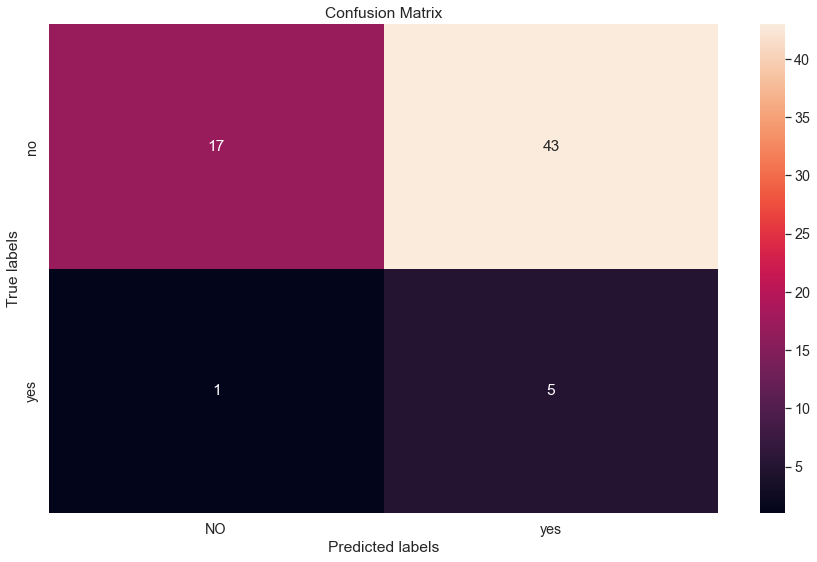

In [1388]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import RandomOverSampler

X = df2[['Delivery_Date', 'Delivery_Term']]  # Features: Delivery date and delivery term
y = df2['Furnished']  # Labels: Furnished or not

X_encoded = pd.get_dummies(X)  # One-hot encoding

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

ros = RandomOverSampler(random_state=0) # to solve imblanaced problem
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

Knn = KNeighborsClassifier()

Knn.fit(X_train_resampled, y_train_resampled )



y_pred = classifier.predict(X_test)

matrix=confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NO', 'yes']); ax.yaxis.set_ticklabels(['no', 'yes']);

print(report)


### low accuracy we will not use this technique we will replace all unknowns with No because it's the common value

In [1389]:
df['Furnished']=df['Furnished'].replace({'Unknown':'No'})

## Level

In [1390]:
df['Level'].unique()

array(['10+', '1', '2', '7', '4', '5', '10', '3', '8', '6', '9',
       'Highest', 'Ground', 'Unknown'], dtype=object)

In [1391]:
if (df[(df['Level']=='Unknown')].shape[0]/df.shape[0])*100 > 80:
    df=df.drop('Level',axis=1)

### we will replace
* '10+' --> 11
* 'Highest' --> 12
* 'Ground' --> 0
* 'Unknown' --> np.nan

In [1392]:
df['Level']=df['Level'].replace({'10+':11})
df['Level']=df['Level'].replace({'Highest':12})
df['Level']=df['Level'].replace({'Ground':0})
df['Level']=df['Level'].replace({'Unknown':np.nan})

## Compound

### if number of unknows > 80% drop the column

In [1393]:
if (df[(df['Compound']=='Unknown')].shape[0]/df.shape[0])*100 > 80:
    df=df.drop('Compound',axis=1)

In [1394]:
df.dtypes

Type              object
Price              int32
Bedrooms           int32
Bathrooms          int32
Area               int32
Furnished         object
Level             object
Payment_Option    object
Delivery_Date     object
Delivery_Term     object
City              object
dtype: object

## Payment_Option

In [1395]:
df['Payment_Option'].isnull().sum()

0

In [1396]:
df['Payment_Option'].unique()

array(['Cash', 'Cash or Installment', 'Unknown Payment', 'Installment'],
      dtype=object)

In [1397]:
df['Payment_Option']=df['Payment_Option'].replace({'Unknown Payment': 'Cash or Installment'})

## Delivery_Term

In [1398]:
df['Delivery_Term'].isnull().sum()

0

In [1399]:
df['Delivery_Term'].unique()

array(['Finished', 'Unknown ', 'Not Finished', 'Core & Shell',
       'Semi Finished'], dtype=object)

In [1400]:
df= df[( (df['Delivery_Date'] != 'Unknown') | (df['Delivery_Term'] != 'Unknown ') )]

In [1401]:
df[(df['Delivery_Term']=='Unknown ')].shape[0]

41

In [1402]:
for i in df['Furnished']:
    if i =='Yes':
        df['Delivery_Term']=df['Delivery_Term'].replace({'Unknown ':'Finished'})
    else:
        df['Delivery_Term']=df['Delivery_Term'].replace({'Unknown ':'Not Finished'})

In [1403]:
df[(df['Delivery_Term']=='Unknown ')].shape[0]

0

## Delivery_Date

In [1404]:
df['Delivery_Date'].isnull().sum()

0

In [1405]:
df['Delivery_Date'].unique()

array(['Ready to move', 'Unknown', 'soon', '2023', '2024', '2025',
       'within 6 months', '2022', '2026'], dtype=object)

In [1406]:
if (df[(df['Delivery_Date']=='Unknown')].shape[0]/df.shape[0])*100 > 80:
    df=df.drop('Delivery_Date',axis=1)

In [1407]:
for i in df['Delivery_Term']:
    if i =='Finished':
        df['Delivery_Date']=df['Delivery_Date'].replace({'Unknown':'Ready to move'})
    else:
        df['Delivery_Date']=df['Delivery_Date'].replace({'Unknown':'soon'})

In [1408]:
df[(df['Delivery_Date']=='Unknown')].shape[0]

0

## Data is clean now

In [1409]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Date,Delivery_Term,City
1,Apartment,4000000,3,3,160,No,11,Cash,Ready to move,Finished,campcaesar
2,Apartment,2250000,3,2,165,No,1,Cash,Ready to move,Finished,smoha
12,Apartment,550000,2,1,94,No,2,Cash,Ready to move,Finished,smoha
13,Apartment,2600000,3,2,140,Yes,11,Cash or Installment,Ready to move,Finished,sidibeshr
48,Apartment,1750000,3,2,160,No,5,Cash,Ready to move,Finished,glim


In [1410]:
df.shape

(545, 11)

In [1411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 1 to 27064
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            545 non-null    object
 1   Price           545 non-null    int32 
 2   Bedrooms        545 non-null    int32 
 3   Bathrooms       545 non-null    int32 
 4   Area            545 non-null    int32 
 5   Furnished       545 non-null    object
 6   Level           505 non-null    object
 7   Payment_Option  545 non-null    object
 8   Delivery_Date   545 non-null    object
 9   Delivery_Term   545 non-null    object
 10  City            545 non-null    object
dtypes: int32(4), object(7)
memory usage: 42.6+ KB


In [1412]:
df.describe()

,Price,Bedrooms,Bathrooms,Area
count,5.450000e+02,545.000000,545.000000,545.000000
mean,2.389893e+06,2.891743,1.902752,173.319266
std,2.664625e+06,0.924158,0.956639,102.652885
min,8.700000e+04,1.000000,1.000000,40.000000
25%,7.900000e+05,2.000000,1.000000,111.000000
50%,1.650000e+06,3.000000,2.000000,145.000000
75%,3.000000e+06,3.000000,2.000000,205.000000
max,2.166800e+07,8.000000,7.000000,800.000000


## visualization

In [1413]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [15, 9]}, font_scale=1.3)

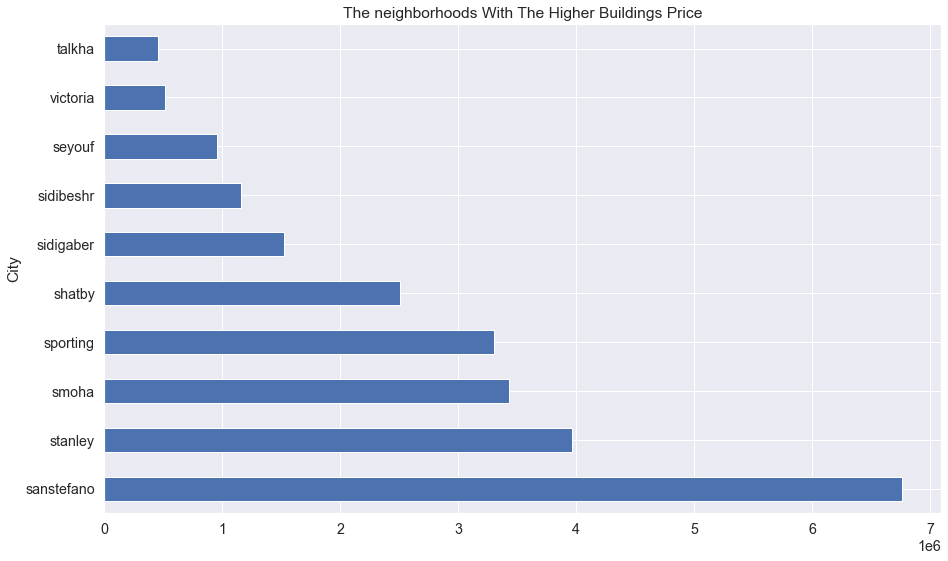

In [1414]:
p1 =df.groupby('City')['Price'].mean()[-11:-1].sort_values(ascending=False)
p1.plot.barh()
plt.title('The neighborhoods With The Higher Buildings Price');
plt.show()

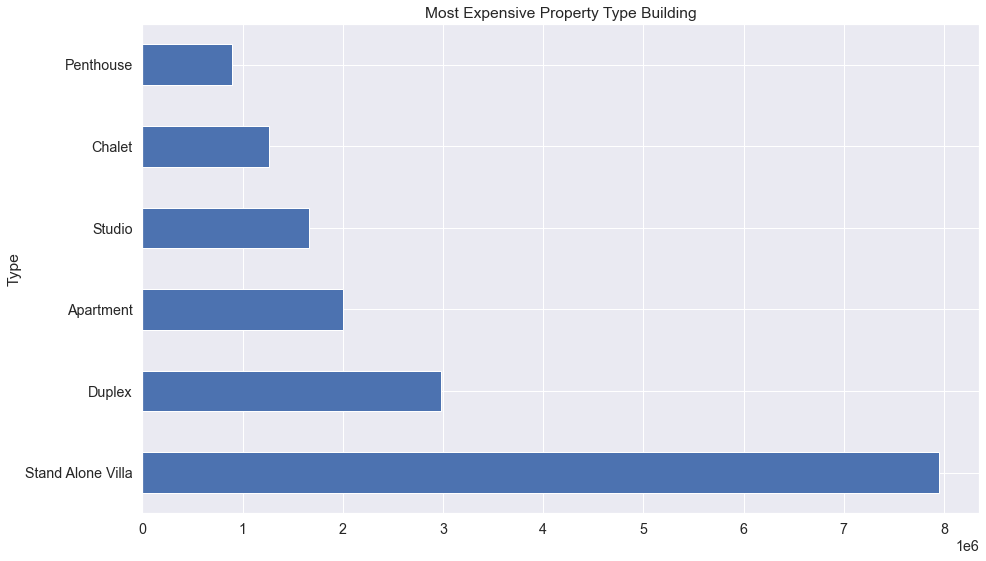

In [1415]:
p2=df.groupby('Type')['Price'].mean()[-11:-1].sort_values(ascending=False)
p2.plot.barh()
plt.title('Most Expensive Property Type Building')
plt.show()

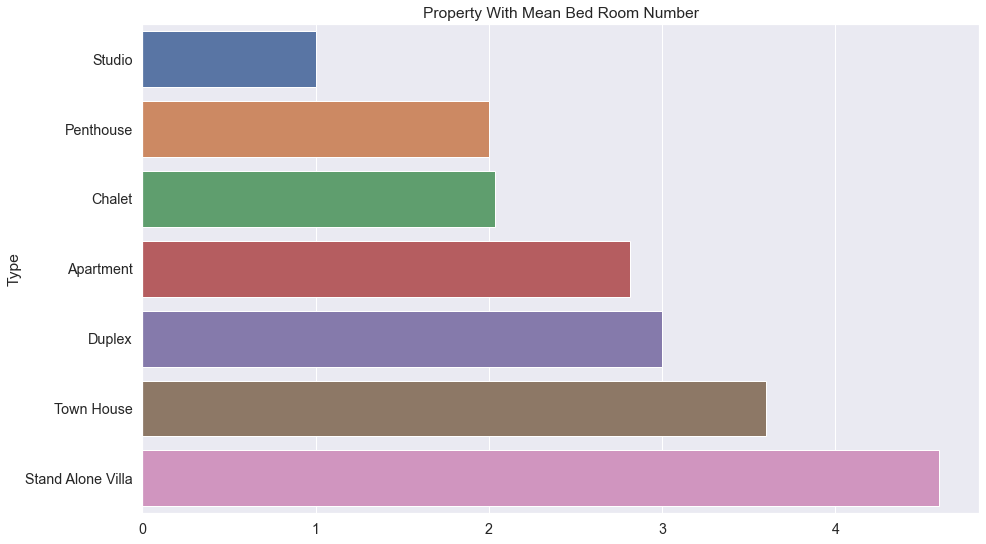

In [1416]:
lpb = df.groupby('Type')['Bedrooms'].mean().sort_values()
sns.barplot(y=lpb.index,x=lpb.values);
plt.title('Property With Mean Bed Room Number');

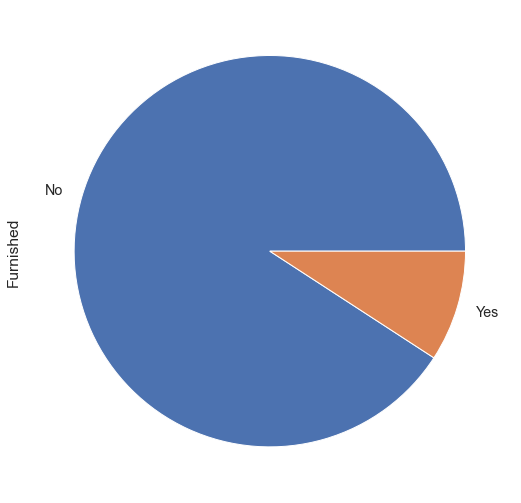

In [1417]:
df['Furnished'].value_counts().plot(kind='pie');

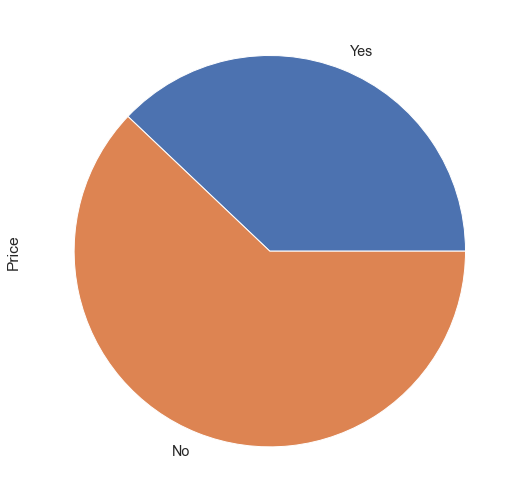

In [1418]:
df.groupby('Furnished')['Price'].mean().sort_values().plot(kind='pie');

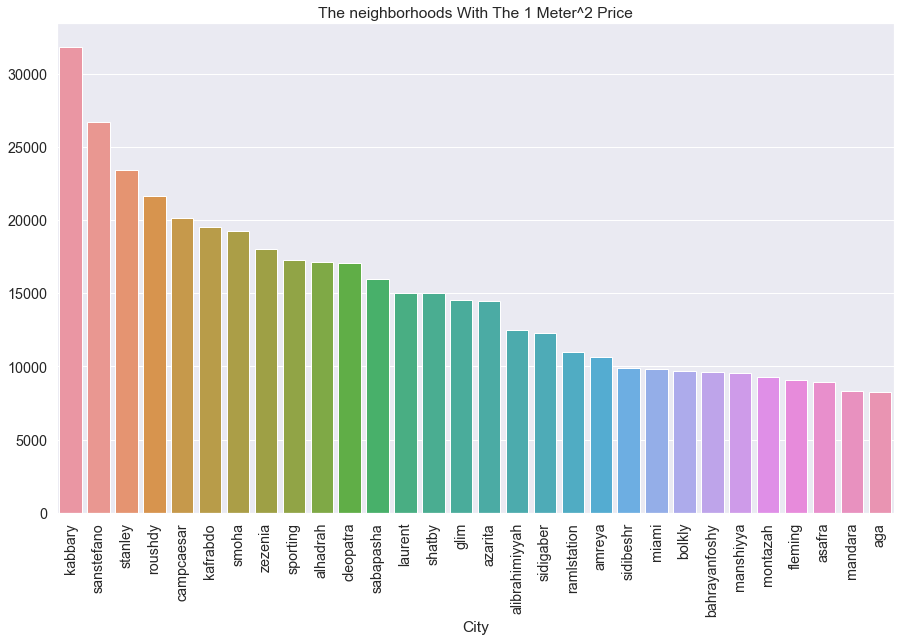

In [1419]:
ind=(df.groupby('City')['Price'].sum()/df.groupby('City')['Area'].sum()).sort_values(ascending=False)[0:30].index
vlu=(df.groupby('City')['Price'].sum()/df.groupby('City')['Area'].sum()).sort_values(ascending=False)[0:30].values
sns.barplot(data = df, x = ind ,y= vlu ,ci = None,order = ind);
plt.xticks(rotation=90);
plt.title('The neighborhoods With The 1 Meter^2 Price');

## Building model

In [1433]:
#Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [1420]:
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Date,Delivery_Term,City
1,Apartment,4000000,3,3,160,No,11,Cash,Ready to move,Finished,campcaesar
2,Apartment,2250000,3,2,165,No,1,Cash,Ready to move,Finished,smoha
12,Apartment,550000,2,1,94,No,2,Cash,Ready to move,Finished,smoha
13,Apartment,2600000,3,2,140,Yes,11,Cash or Installment,Ready to move,Finished,sidibeshr
48,Apartment,1750000,3,2,160,No,5,Cash,Ready to move,Finished,glim
...,...,...,...,...,...,...,...,...,...,...,...
25894,Stand Alone Villa,14200000,6,4,310,No,NaN,Installment,2024,Finished,smoha
26174,Stand Alone Villa,2500000,3,2,218,No,NaN,Cash or Installment,Ready to move,Finished,smoha
26292,Stand Alone Villa,7000000,5,5,388,No,NaN,Cash,Ready to move,Finished,amreya
27024,Stand Alone Villa,4000000,4,5,500,No,NaN,Cash,Ready to move,Finished,amreya


In [1421]:
x=df[['Type','Furnished','Level','Payment_Option','Delivery_Date','Delivery_Term','City']]
y=df['Price']

In [1422]:
X_encoded = pd.get_dummies(x) 

In [1423]:
X_encoded.insert(0,'Bedrooms',df['Bedrooms'])
X_encoded.insert(0,'Area',df['Area'])
X_encoded.insert(0,'Bathrooms',df['Bathrooms'])

In [1429]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_encoded,y,test_size = 0.25,shuffle = True ,random_state = 404)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((408, 78), (137, 78), (408,), (137,))

In [1430]:
def performance(model,X_train,y_train,y_pred,y_test):
    '''
    This function for calculating the performance of the model.
    INPUT:
    model: Regression Model. The regression model.
    x_train: numpy.ndarray. The training data in the x.
    y_train: pandas.core.series.Series. The training data in the y.
    y_pred: numpy.ndarray. The predicted data.
    y_test: pandas.core.series.Series. The actual data.
    OUTPUT:
    The model performance by different metrics.
    '''
    print('Training Score:',model.score(X_train,y_train))
    print('Testing Score:',r2_score(y_test,y_pred))
    print('Other Metrics In Testing Data: ')
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('MAE:',mean_absolute_error(y_test,y_pred))

In [1434]:
#Fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)

#The predicted data
lr_pred = lr.predict(X_test)

In [1435]:
performance(lr,X_train,y_train,lr_pred,y_test)

Training Score: 0.7507463784678091
Testing Score: 0.4545512602048106
Other Metrics In Testing Data: 
MSE: 1810071244970.7969
MAE: 912645.204477613


In [1436]:
#Fitting the model
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

#The predicted data
dt_pred = dt.predict(X_test)

#The performance
performance(dt,X_train,y_train,dt_pred,y_test)

Training Score: 0.9999739025828878
Testing Score: 0.22539476374117484
Other Metrics In Testing Data: 
MSE: 2570526911259.124
MAE: 814027.3722627737


In [1438]:
#Fitting the model
rf = RandomForestRegressor()
rf.fit(X_train,y_train.values.ravel())

#The predicted data
rf_pred = rf.predict(X_test)

#The performance
performance(rf,X_train,y_train,rf_pred,y_test)

Training Score: 0.9595425353699194
Testing Score: 0.689645734079962
Other Metrics In Testing Data: 
MSE: 1029910404975.5756
MAE: 594508.2877719847


#### there is overfitting in model